# Data loading 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.cluster import KMeans
import os
from IPython.display import Image
from matplotlib import style
style.use("ggplot")

os.getcwd() 
os.chdir('/Users/DHY/Dropbox/2018/WB/PredictorSelection')
df_source=pd.read_stata('Bangladesh2014_recent.dta')
df=df_source[['birthorder',
 'age_child',
 'gender_child',
 'birthmonth',
 'interview_month',
 'hhsize_defacto',
 'under5',
 'region',
 'residence',
 'drinkingwater',
# 'water_time',
 'wateronpremises',  
 'toilet',
 'floor',
 'wall',
 'roof',
 'cooking_fuel',
 'net',
 'washhands',
 'water_treat',
 'cooking_location',
 'agri_ownership',
# 'bank',
 'wealth_index',
# 'house_ownership',
# 'insurance',
# 'bpl',
# 'age_father',
# 'weight_father',
# 'height_father',
# 'edu_father',
 'age_mother',
 'edu_mother',
 'weight_mother',
 'height_mother',
 'hemoglobin_mother',
 'death_under5',
 'HAZ', 'stunt']]

# 'bank' 'house_ownership' 'insurance' 'bpl' 'age_father' 'weight_father'\n 'height_father' 'edu_father'

df_target=df_source[['HAZ', 'stunt' ,'svr_stunt','WHZ' ,'wast' ,'svr_wast' ,'WAZ' ,'underweight' ,'svr_underweight']]


In [2]:
# Check format of variables in dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7494 entries, 0 to 7493
Data columns (total 30 columns):
birthorder           7494 non-null int8
age_child            7494 non-null int8
gender_child         7494 non-null category
birthmonth           7493 non-null float64
interview_month      7494 non-null float32
hhsize_defacto       7494 non-null int8
under5               7494 non-null int8
region               7494 non-null category
residence            7494 non-null category
drinkingwater        7494 non-null category
wateronpremises      7494 non-null object
toilet               7493 non-null category
floor                7494 non-null category
wall                 7494 non-null category
roof                 7494 non-null category
cooking_fuel         7494 non-null category
net                  0 non-null category
washhands            7492 non-null category
water_treat          7494 non-null category
cooking_location     7494 non-null category
agri_ownership       7494 non-null c

In [3]:
# Sort variables by data format  - Check if all variabls are allocated as in correct format 
dfType=df.dtypes
dfType=pd.DataFrame(dfType.value_counts())
dfType=dfType.reset_index()
dfType.columns=["VarType","value"]
dfType['percent']=(dfType['value']/len(df.columns))*100
dfType['Variables']=""
vartypes=["float64","float32", "int64","int8","category"]
for vartype in vartypes:
    ObjectVarNam=df.columns[df.dtypes==vartype].tolist()
    strObjectVarNam=', '.join('"{0}"'.format(w) for w in ObjectVarNam)
    dfType.loc[(dfType['VarType']==vartype), "Variables"]= strObjectVarNam

dfType

,VarType,value,percent,Variables
0,category,19,63.333333,"""gender_child"", ""region"", ""residence"", ""drinki..."
1,int8,6,20.000000,"""birthorder"", ""age_child"", ""hhsize_defacto"", ""..."
2,float64,2,6.666667,"""birthmonth"", ""stunt"""
3,float32,2,6.666667,"""interview_month"", ""HAZ"""
4,object,1,3.333333,


In [4]:
dfType['Variables'].iloc[0] # show categorical variables 

'"gender_child", "region", "residence", "drinkingwater", "toilet", "floor", "wall", "roof", "cooking_fuel", "net", "washhands", "water_treat", "cooking_location", "agri_ownership", "wealth_index", "edu_mother", "weight_mother", "height_mother", "hemoglobin_mother"'

In [5]:
dfType['Variables'].iloc[1] # show integer variables 

'"birthorder", "age_child", "hhsize_defacto", "under5", "age_mother", "death_under5"'

## Data cleaning & Descriptive stats

In [6]:
# Data cleaning 
# Drop variables with many missing rows 
# Keep as much as data possible (Threshold 90% of trimmed dataset from above)
df.isnull().sum()
df_clean=df.dropna(thresh=0.9*len(df), axis=1) # drop variables missing more than 10%
temp=pd.DataFrame(df_clean.isnull().sum()/len(df_clean)*100.00)
temp.columns=['missing_Percent']
temp=temp[temp['missing_Percent']>0]
temp # shows list& % of variables that are missing less than 10% 

,missing_Percent
birthmonth,0.013344
toilet,0.013344
washhands,0.026688
weight_mother,0.667200
height_mother,0.760608
HAZ,7.045637
stunt,7.165733


In [7]:
temp['colnam']=temp.index
temp
df_light=df_clean.dropna(subset = [temp.colnam])
df_light.isnull().sum() # Check all variables have no missing rows 


birthorder          0
age_child           0
gender_child        0
birthmonth          0
interview_month     0
hhsize_defacto      0
under5              0
region              0
residence           0
drinkingwater       0
wateronpremises     0
toilet              0
floor               0
wall                0
roof                0
cooking_fuel        0
washhands           0
water_treat         0
cooking_location    0
agri_ownership      0
wealth_index        0
age_mother          0
edu_mother          0
weight_mother       0
height_mother       0
death_under5        0
HAZ                 0
stunt               0
dtype: int64

In [8]:
(1-(len(df_light)*1.00/len(df_source)*1.00))*100.00 # Shows % of dropped rows compare to the original data 

7.459300773952493

In [9]:
colnum=df_light.shape
tot_colnum=df.shape
tot_colnum[1]-colnum[1] # Number of deleted columns due to complete(>90%) missing

2

In [10]:
df_light.height_mother=df_light.height_mother.astype(float)
#df_light.height_father=df_light.height_fater.astype(float)
df_light.weight_mother=df_light.weight_mother.astype(float)
#df_light.weight_father=df_light.weight_fater.astype(float)
#df_light.hemoglobin_mother=df_light.hemoglobin_mother.astype(float)

df_light.birthmonth=df_light.birthmonth.astype(int)
df_light.interview_month=df_light.interview_month.astype(int)
#df_light.age_father=df_light.age_father.astype(int)
df_light.age_mother=df_light.age_mother.astype(int)
df_light.death_under5=df_light.death_under5.astype(int)
df_light.stunt=df_light.stunt.astype(int)

df_light.wateronpremises=df_light.wateronpremises.astype('category')

/anaconda2/lib/python2.7/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [11]:
#Numeric variables 
temp=df_light.describe().transpose()
temp
#print len(temp)

,count,mean,std,min,25%,50%,75%,max
birthorder,6935.0,2.228262,1.460748,1.000000,1.000000,2.000000,3.000000,13.000000
age_child,6935.0,29.553569,17.036176,0.000000,14.000000,30.000000,45.000000,59.000000
birthmonth,6935.0,6.593944,3.538990,1.000000,3.000000,7.000000,10.000000,12.000000
interview_month,6935.0,10.000000,0.000000,10.000000,10.000000,10.000000,10.000000,10.000000
hhsize_defacto,6935.0,5.876280,2.709837,2.000000,4.000000,5.000000,7.000000,25.000000
under5,6935.0,1.341601,0.743761,0.000000,1.000000,1.000000,2.000000,7.000000
age_mother,6935.0,25.584283,5.857609,15.000000,21.000000,25.000000,29.000000,49.000000
weight_mother,6935.0,49.423244,9.790202,25.500000,42.200001,47.900002,55.099998,117.900002
height_mother,6935.0,151.110426,5.660180,100.900002,147.500000,151.100006,154.699997,196.600006
death_under5,6935.0,0.133093,0.424610,0.000000,0.000000,0.000000,0.000000,8.000000


In [12]:
#Object variables
temp=df_light.describe(include=['category']).transpose()
temp['prop_top_value']=(temp['freq']/len(df_light))*100.00
temp.sort_values(by=['unique'])
#print len(temp)

,count,unique,top,freq,prop_top_value
gender_child,6935,2,male,3556,51.2761
residence,6935,2,rural,4757,68.5941
water_treat,6935,2,no,6267,90.3677
agri_ownership,6935,2,no,3910,56.3807
wateronpremises,6935,3,Yes,5023,72.4297
edu_mother,6935,3,Secondary and Higher,3937,56.77
washhands,6935,4,observed,6625,95.5299
cooking_location,6935,4,in a separate building,4693,67.6712
wealth_index,6935,5,poorest,1504,21.6871
region,6935,7,chittagong,1314,18.9474


In [13]:
# Shows categorical variable proportion in each level when it has more than 3 categories
temp_short=temp[temp['unique']>=3]
colnam=temp_short.index

levellists=colnam
for levellist in levellists : 
    print "----------------"
    print ((df_light[levellist].value_counts())/len(df_light))*100
    

----------------
chittagong    18.947368
dhaka         17.433309
sylhet        15.890411
rajshahi      12.545061
rangpur       12.372026
barisal       11.665465
khulna        11.146359
Name: region, dtype: float64
----------------
tube well or borehole                                   89.358327
piped into dwelling                                      3.446287
piped to yard/plot                                       2.134102
public tap/standpipe                                     2.062004
river/dam/lake/ponds/stream/canal/irrigation channel     1.614996
rainwater                                                0.360490
unprotected well                                         0.317231
bottled water                                            0.216294
protected well                                           0.129776
other                                                    0.115357
cart with small tank                                     0.115357
unprotected spring                         

In [28]:
df_encode=df_light[colnam]
df_encode.head()
df_dummy = pd.get_dummies(df_encode, drop_first=False)

test1=temp_short.index
df_nodummy=df_light.drop(test1,axis=1)

df_final=pd.concat([df_nodummy, df_dummy], axis=1)
df_final.shape

(6935, 107)

In [ ]:
# df_final : Clean & encoded dataset 
# df_encode : dataset by categorical variables with only +3 level 
# df_target : Set of target variables 
# df_source : Original dataset 
# df_light = byproduct 
del test1 

## Visuliazation 

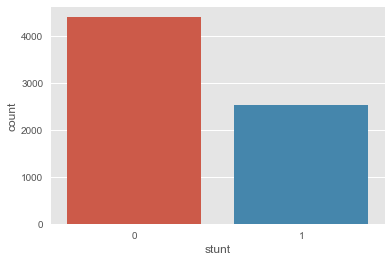

In [25]:
%matplotlib inline 
sns.countplot(x="stunt", data=df_light)

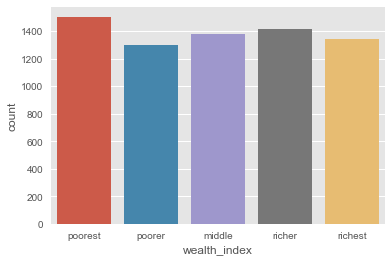

In [26]:
sns.countplot(x="wealth_index", data=df_light)

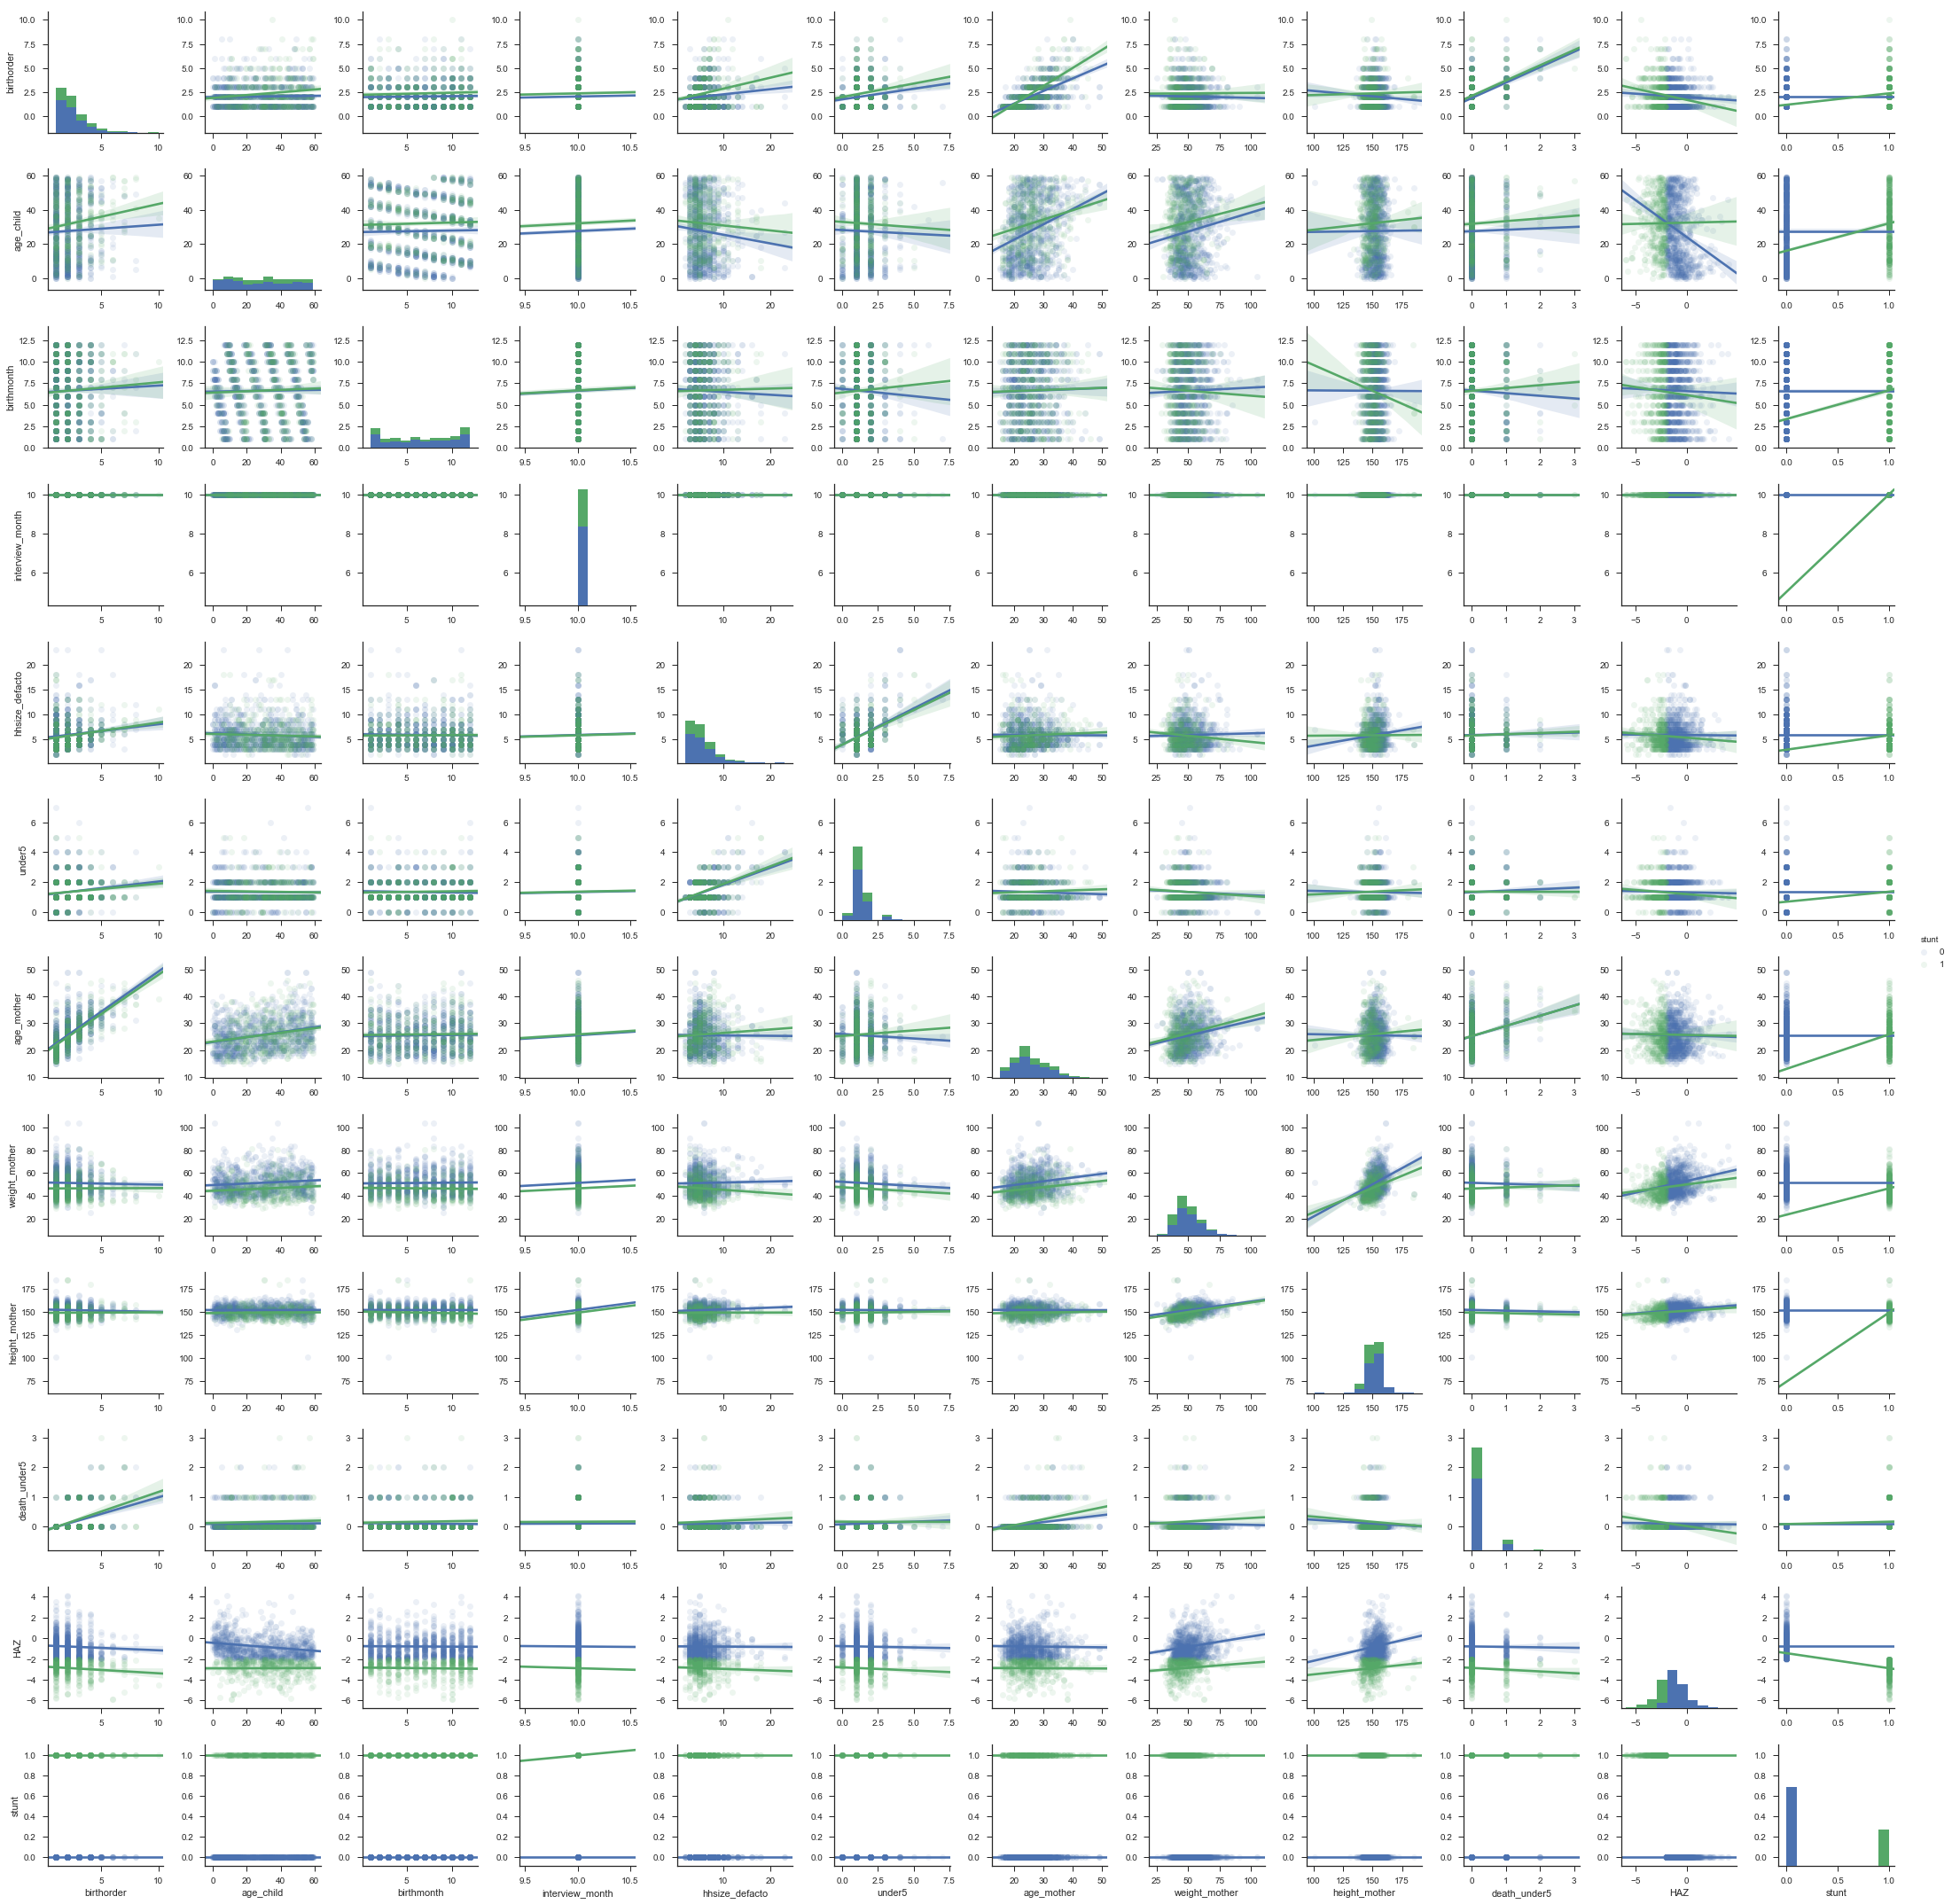

In [29]:
import seaborn as sns
sns.set(style="ticks")

df_20perc=df_nodummy.sample(frac=0.2, replace=True)
sns.pairplot(df_20perc, hue="stunt", kind="reg", plot_kws={'scatter_kws': {'alpha': 0.1}})

In [30]:
df_graph=pd.concat([df_final, df_encode], axis=1)

In [ ]:


from scipy import stats

def corrfunc(x, y, **kws):
  r, p = stats.pearsonr(x, y)
  p_stars = ''
  if p <= 0.05:
    p_stars = '*'
  if p <= 0.01:
    p_stars = '**'
  if p <= 0.001:
    p_stars = '***'
  ax = plt.gca()
  ax.annotate('r = {:.2f} '.format(r) + p_stars,
              xy=(0.05, 0.9), xycoords=ax.transAxes)

def annotate_colname(x, **kws):
  ax = plt.gca()
  ax.annotate(x.name, xy=(0.05, 0.9), xycoords=ax.transAxes,
              fontweight='bold')

def cor_matrix(df):
  g = sns.PairGrid(df, palette=['red'])
  # Use normal regplot as `lowess=True` doesn't provide CIs.
  g.map_upper(sns.regplot, scatter_kws={'s':10})
  g.map_diag(sns.distplot)
  g.map_diag(annotate_colname)
  g.map_lower(sns.kdeplot, cmap='Blues_d')
  g.map_lower(corrfunc)
  # Remove axis labels, as they're in the diagonals.
  for ax in g.axes.flatten():
    ax.set_ylabel('')
    ax.set_xlabel('')
  return g

cor_matrix(df_final)

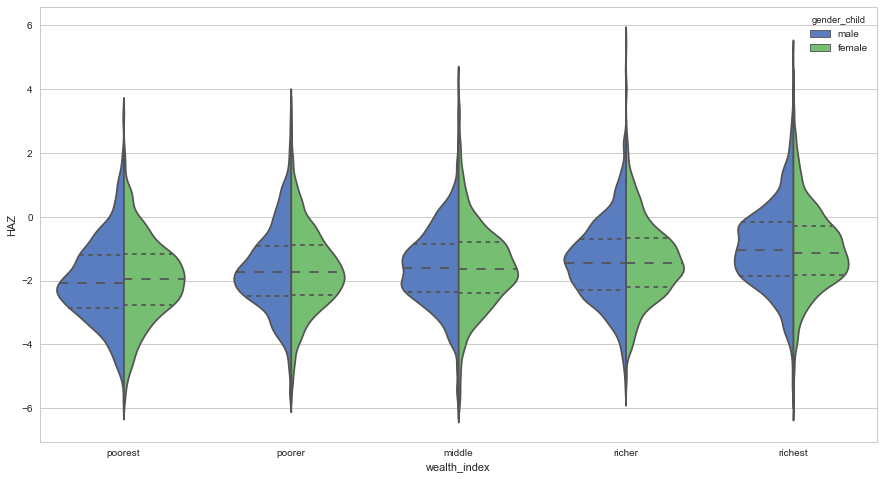

In [31]:
plt.figure(figsize=(15,8))
sns.set(style="whitegrid")
sns.violinplot(x='wealth_index', y='HAZ', hue='gender_child', split=True, palette="muted",data=df_graph , scale="count", inner="quartile",scale_hue=False, bw=.2)


## Data building for model

In [16]:
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_auc_score

## Normalize numeric variables & concate with encoded dummy variables

In [32]:
df_nodummy.columns.tolist()

['birthorder',
 'age_child',
 'gender_child',
 'birthmonth',
 'interview_month',
 'hhsize_defacto',
 'under5',
 'residence',
 'water_treat',
 'agri_ownership',
 'age_mother',
 'weight_mother',
 'height_mother',
 'death_under5',
 'HAZ',
 'stunt']

In [33]:
df_nodummy.head(5).transpose()

,0,1,2,3,4
birthorder,2,2,3,1,4
age_child,13,47,23,11,51
gender_child,female,female,female,female,female
birthmonth,6,8,8,8,4
interview_month,10,10,10,10,10
hhsize_defacto,5,5,4,2,4
under5,1,1,1,1,1
residence,rural,rural,rural,rural,rural
water_treat,no,no,no,no,no
agri_ownership,no,yes,no,no,yes


In [34]:
pipeline = Pipeline([('imputer', Imputer(strategy = 'median')),('scaler', MinMaxScaler())])
X_temp=df_nodummy.drop(['gender_child','residence',
                        #'net', 'house_ownership',
                        'agri_ownership','water_treat' ,
                         'stunt','HAZ'], axis=1)


/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [47]:
X = pipeline.fit_transform(X_temp)
X=pd.DataFrame(X)
X.columns=X_temp.columns.tolist()

x_test=X.reset_index(drop=True)
df_dummy_test=df_dummy.reset_index(drop=True)
#df_orig=pd.concat([X, df_dummy], axis=1, join='inner')
df_orig=pd.concat([x_test, df_dummy_test], axis=1)

df_dummy_test.shape,x_test.shape, df_orig.shape

((6935, 91), (6935, 10), (6935, 101))

In [48]:
y=df_graph['stunt']
ytemp=pd.concat([df_graph, df_orig], axis=1, join='outer')
ytemp.columns.tolist()

['birthorder',
 'age_child',
 'gender_child',
 'birthmonth',
 'interview_month',
 'hhsize_defacto',
 'under5',
 'residence',
 'water_treat',
 'agri_ownership',
 'age_mother',
 'weight_mother',
 'height_mother',
 'death_under5',
 'HAZ',
 'stunt',
 'region_barisal',
 'region_chittagong',
 'region_dhaka',
 'region_khulna',
 'region_rajshahi',
 'region_rangpur',
 'region_sylhet',
 'drinkingwater_piped into dwelling',
 'drinkingwater_piped to yard/plot',
 'drinkingwater_public tap/standpipe',
 'drinkingwater_tube well or borehole',
 'drinkingwater_protected well',
 'drinkingwater_unprotected well',
 'drinkingwater_protected spring',
 'drinkingwater_unprotected spring',
 'drinkingwater_river/dam/lake/ponds/stream/canal/irrigation channel',
 'drinkingwater_rainwater',
 'drinkingwater_tanker truck',
 'drinkingwater_cart with small tank',
 'drinkingwater_bottled water',
 'drinkingwater_other',
 'wateronpremises_N.A',
 'wateronpremises_No',
 'wateronpremises_Yes',
 'toilet_flush to piped sewer s

In [51]:
df_orig.shape, df_graph.shape

((6935, 101), (6935, 119))

In [52]:
# Assign target as "stunt" and split for test/train 
y=df_graph['stunt']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_orig, y, test_size=0.20, random_state=110)
 

## Build models 

In [53]:
# LGB model 
import lightgbm as lgb

gbm = lgb.LGBMClassifier()
gbm.fit(X_train, y_train)

y_pred = gbm.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

/anaconda2/lib/python2.7/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


Accuracy: 68.06%


In [56]:
# XGB model 
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 68.49%


In [54]:
# Tree model 
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets

# Create adaboost-decision tree classifer object
clf = AdaBoostClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 69.21%


In [57]:
from sklearn.ensemble import VotingClassifier
ensemble=VotingClassifier(
    estimators=[('LGB', gbm), 
                ('XGB', xgb),
                ('tree', clf)], 
                       voting='soft').fit(X_train,y_train)
#print('The accuracy for ensemble model:', ensemble.score(X_test,y_test))

In [58]:
y_pred = ensemble.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 68.42%


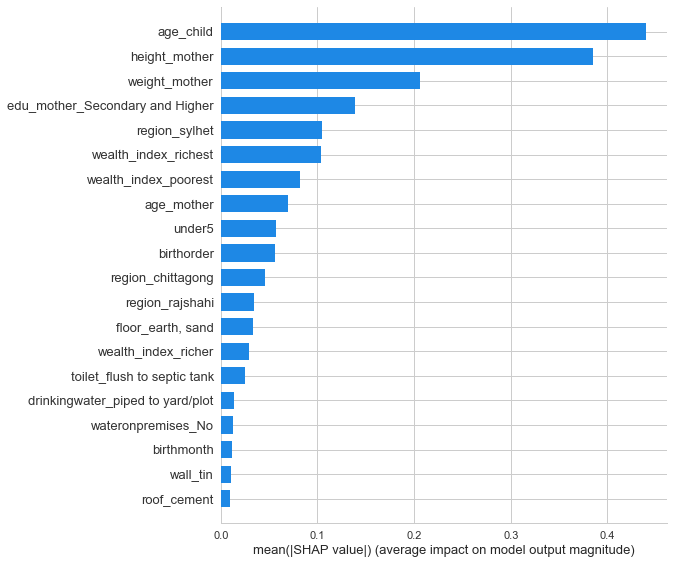

In [63]:
# visualization 
import shap
shap_values = shap.TreeExplainer(xgb).shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

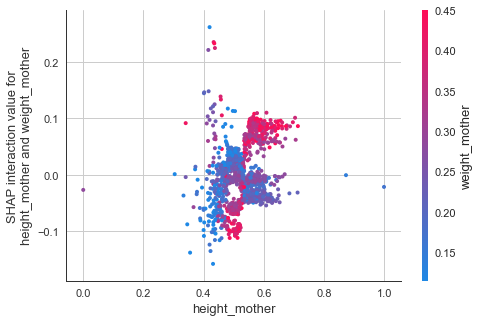

In [64]:
shap_interaction_values = shap.TreeExplainer(xgb).shap_interaction_values(X_test)


shap.dependence_plot(
    ("height_mother", "weight_mother"),
    shap_interaction_values, X_test,
    display_features=X_test
)

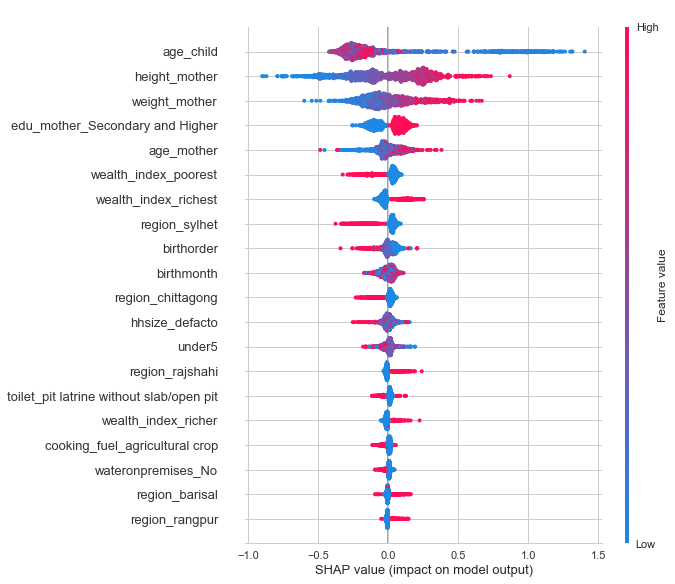

In [65]:
y=df_nodummy['HAZ']
X_train, X_test, y_train, y_test = train_test_split(df_orig, y, test_size=0.20, random_state=110)
gbm = lgb.LGBMRegressor()
gbm.fit(X_train, y_train)
y_pred = gbm.predict(X_test)
shap_values = shap.TreeExplainer(gbm).shap_values(X_test)
shap.summary_plot(shap_values, X_test)

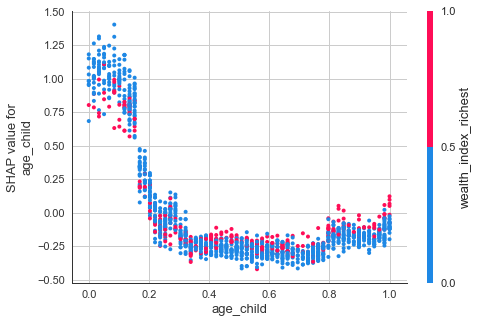

In [66]:
shap.dependence_plot("age_child", shap_values, X_test)

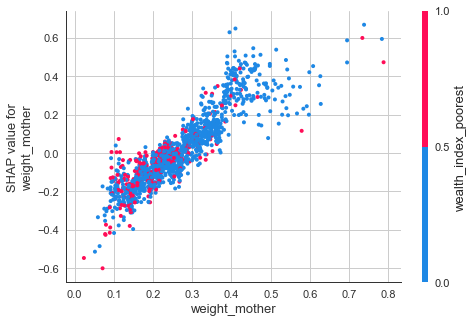

In [67]:
shap.dependence_plot("weight_mother", shap_values, X_test)

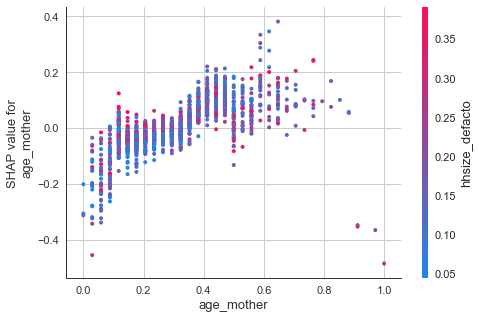

In [69]:
shap.dependence_plot("age_mother", shap_values, X_test)

## END - 